In [8]:
import pandas as pd
import matplotlib.pyplot as plt

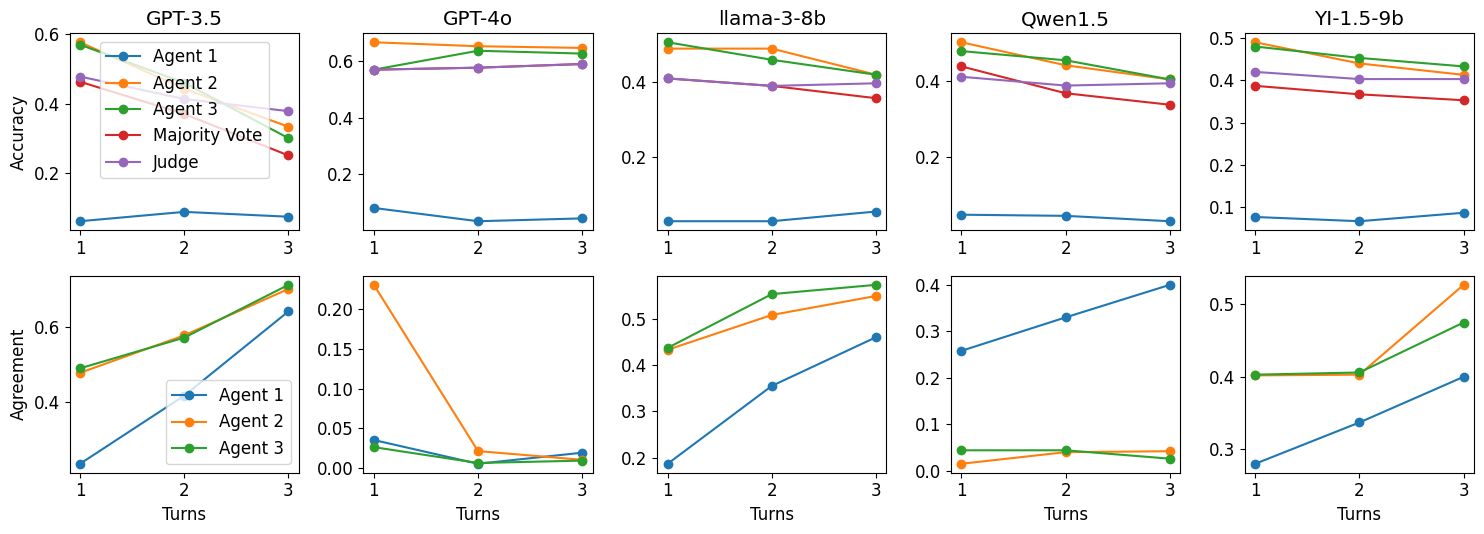

In [22]:
# Adjusting the data dictionary to ensure all lists have the same length
data = {
    "Group": ["GPT-3.5"] * 3 + ["GPT-4o"] * 3 + ["llama-3-8b"] * 3 + ["Qwen1.5"] * 3 + ["YI-1.5-9b"] * 3,
    "Turns": [1, 2, 3] * 5,
    "Accuracy_Agent1": [0.06, 0.087, 0.073, 0.08, 0.033, 0.043, 0.027, 0.027, 0.053, 0.05, 0.047, 0.033, 0.077, 0.067, 0.087],
    "Accuracy_Agent2": [0.577, 0.443, 0.333, 0.667, 0.653, 0.647, 0.49, 0.49, 0.42, 0.5, 0.44, 0.403, 0.49, 0.44, 0.413],
    "Accuracy_Agent3": [0.57, 0.46, 0.3, 0.57, 0.637, 0.627, 0.507, 0.46, 0.42, 0.477, 0.453, 0.403, 0.48, 0.453, 0.433],
    "Accuracy_Majority": [0.463, 0.37, 0.25, 0.57, 0.577, 0.59, 0.41, 0.39, 0.357, 0.437, 0.367, 0.337, 0.387, 0.367, 0.353],
    "Accuracy_Judge": [0.478, 0.413, 0.378, 0.57, 0.577, 0.59, 0.41, 0.39, 0.397, 0.41, 0.387, 0.393, 0.42, 0.403, 0.403],
    "Agreement_Agent1": [0.235, 0.417, 0.642, 0.035, 0.005, 0.019, 0.187, 0.355, 0.46, 0.258, 0.33, 0.4, 0.28, 0.337, 0.4],
    "Agreement_Agent2": [0.478, 0.578, 0.702, 0.231, 0.021, 0.01, 0.433, 0.508, 0.549, 0.015, 0.04, 0.042, 0.402, 0.403, 0.527],
    "Agreement_Agent3": [0.49, 0.572, 0.713, 0.026, 0.006, 0.009, 0.437, 0.553, 0.573, 0.044, 0.044, 0.026, 0.403, 0.406, 0.475],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to plot the results
def plot_results(df):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5.5))
    groups = df['Group'].unique()
    
    for i, group in enumerate(groups):
        group_data = df[df['Group'] == group]
        turns = group_data['Turns']
        
        # Accuracy plots
        axes[0, i].plot(turns, group_data['Accuracy_Agent1'], marker='o', label='Agent 1')
        axes[0, i].plot(turns, group_data['Accuracy_Agent2'], marker='o', label='Agent 2')
        axes[0, i].plot(turns, group_data['Accuracy_Agent3'], marker='o', label='Agent 3')
        axes[0, i].plot(turns, group_data['Accuracy_Majority'], marker='o', label='Majority Vote')
        axes[0, i].plot(turns, group_data['Accuracy_Judge'], marker='o', label='Judge')
        axes[0, i].set_title(f'{group}')
        # axes[0, i].set_xlabel('Turns')
        axes[0, i].set_ylabel('Accuracy')
        # legend
        if i == 0:
            axes[0, i].legend()
        
        # Agreement plots
        axes[1, i].plot(turns, group_data['Agreement_Agent1'], marker='o', label='Agent 1')
        axes[1, i].plot(turns, group_data['Agreement_Agent2'], marker='o', label='Agent 2')
        axes[1, i].plot(turns, group_data['Agreement_Agent3'], marker='o', label='Agent 3')
        # axes[1, i].set_title(f'Agreement {group}')
        axes[1, i].set_xlabel('Turns')
        axes[1, i].set_ylabel('Agreement')
        # legend
        if i == 0:
            axes[1, i].legend()

        if i == 0:
            axes[0, i].set_ylabel('Accuracy')
            axes[1, i].set_ylabel('Agreement')
        else:
            axes[0, i].set_ylabel('')
            axes[1, i].set_ylabel('')
    
    plt.tight_layout()
    plt.show()

plot_results(df)
